In [1]:
import os, ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpt
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import matplotlib.transforms as mtransforms

In [2]:
%matplotlib inline
mpt.rcParams['figure.dpi'] = 300 
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['font.family'] = 'cmr10'

In [3]:
baselinefile = pd.read_csv('../Outputs/Unpurned_measures.csv')
Prunedfile = pd.read_csv('../Outputs/Purned_measures.csv')
datasets = ['ER', 'WS', 'BA']
Edge_measures = ['FR', 'ORC', 'EBC']
Measures = ['Accuracy', 'Specificity', 'Recall/Sensitivity', 'AUC_ROC', 'Precision', 'F1_Score'] # Prunedfile.columns[2:].tolist()
print(Measures)
baselinefile.shape

['Accuracy', 'Specificity', 'Recall/Sensitivity', 'AUC_ROC', 'Precision', 'F1_Score']


(3, 7)

In [4]:
data_all_unpruned = {measure :{dataset: ast.literal_eval(baselinefile.loc[baselinefile['datasets'] == dataset, measure].values[0]) for dataset in datasets } for measure in Measures}
data_all_pruned = {measure :{dataset:{edgemeasure: ast.literal_eval(Prunedfile.loc[(Prunedfile['datasets'] == dataset) & (Prunedfile['Edge_measures'] == edgemeasure), measure].values[0]) for edgemeasure in Edge_measures} for dataset in datasets} for measure in Measures}
len(data_all_unpruned), data_all_pruned.keys()

(6,
 dict_keys(['Accuracy', 'Specificity', 'Recall/Sensitivity', 'AUC_ROC', 'Precision', 'F1_Score']))

dict_keys(['Accuracy', 'Specificity', 'Recall/Sensitivity', 'AUC_ROC', 'Precision', 'F1_Score'])


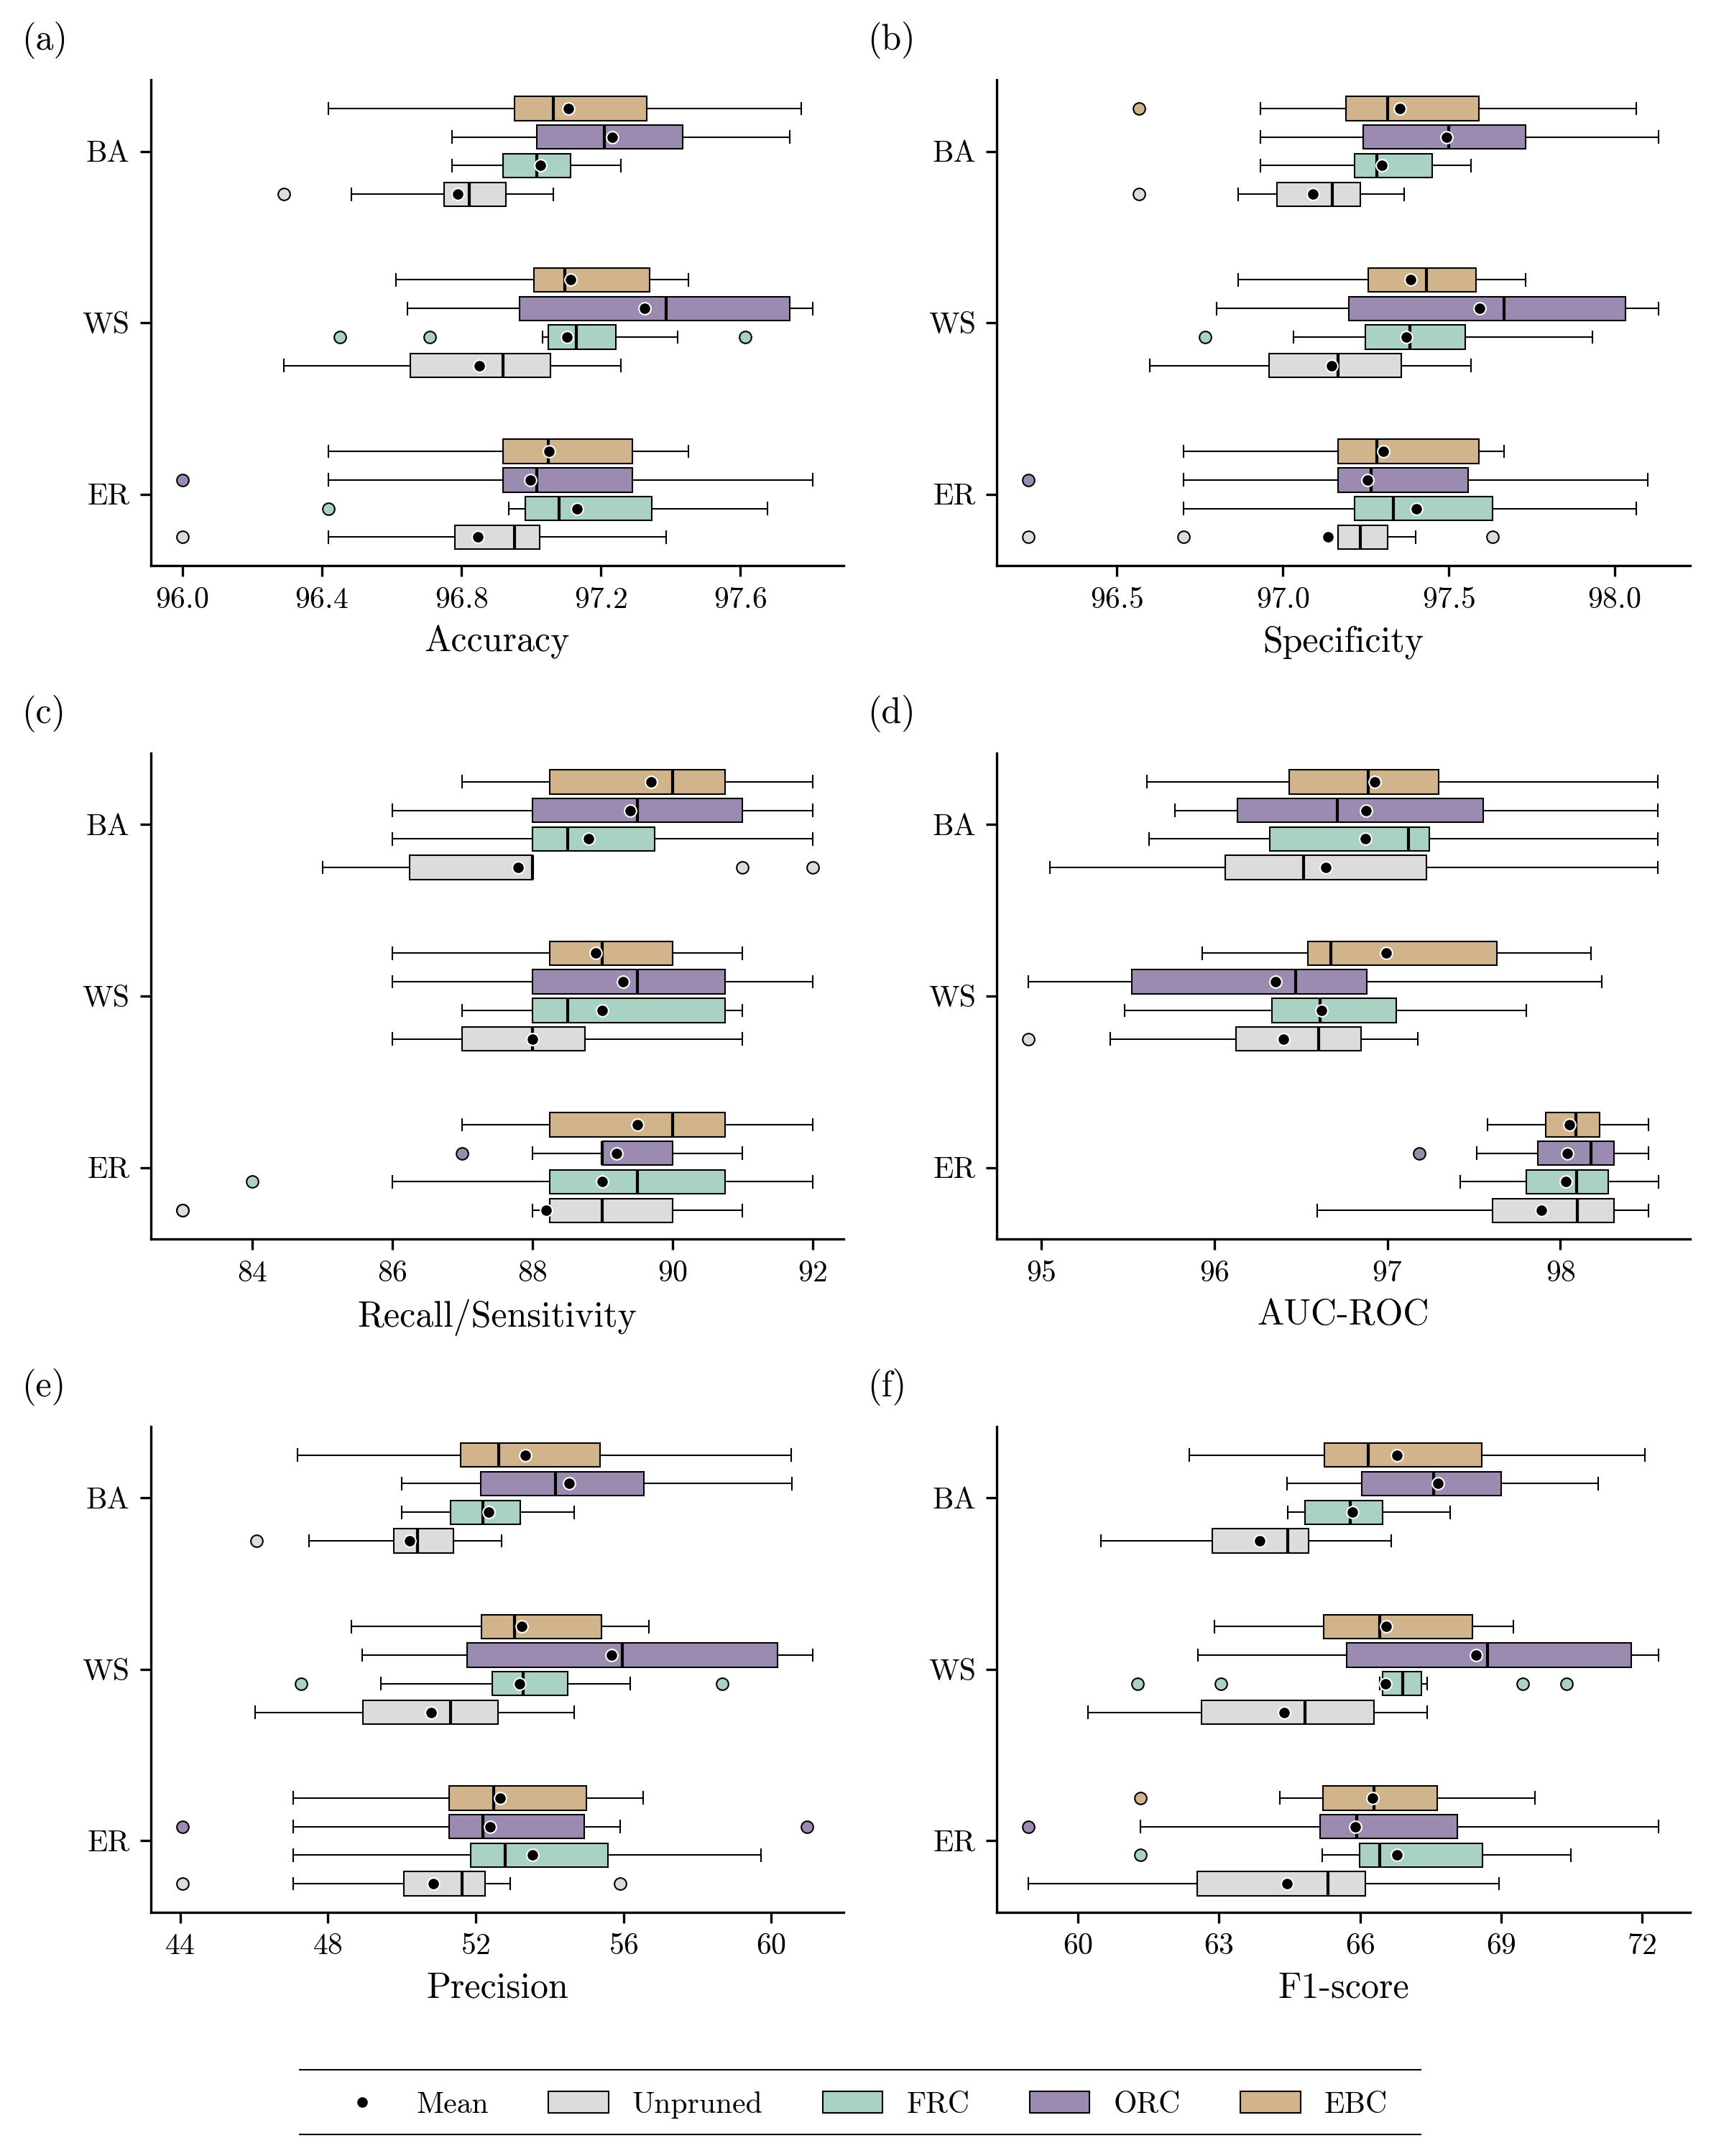

In [5]:
# Plot
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes_flat = axes.flatten()

print(data_all_pruned.keys())
Titles = ['Accuracy', 'Specificity', 'Recall/Sensitivity', 'AUC-ROC', 'Precision', 'F1-score']
method_colors = {'Unpruned': 'gainsboro', 'FR': '#a9d2c3', 'ORC': '#9c8bb0', 'EBC': 'tan'} #plum tan darksalmon ["#9c8bb0", "#a9d2c3"]
opacity = 1
labels = ['(a)','(b)','(c)','(d)', '(e)', '(f)']  

for count, (ax, key, label) in enumerate(zip(axes_flat, data_all_pruned.keys(), labels)):    
    dict1 = data_all_unpruned[key]
    dict2 = data_all_pruned[key]
    all_data = []
    positions = []
    box_colors = []
    for i, dataset in enumerate(datasets):
        center = i * 3  
        offsets = [-0.75, -0.25, 0.25, 0.75]     # spread boxplots in each group
        all_data.append(dict1[dataset])
        positions.append(center + offsets[0])
        box_colors.append(method_colors['Unpruned'])
        for j, measure in enumerate(Edge_measures):
            all_data.append(dict2[dataset][measure])
            positions.append(center + offsets[j+1])
            box_colors.append(method_colors[measure])

    bp = ax.boxplot(all_data, vert=False, patch_artist=True, showmeans=True, positions=positions, widths=0.42,
        meanprops=dict(marker='.', markerfacecolor='black', markeredgecolor='white', markeredgewidth=0.5, markersize=8, linestyle='none'),
        flierprops=dict(marker='o', markersize=4, markeredgewidth=0.5, linestyle='none'))

    for box_patch, flier, color in zip(bp['boxes'], bp['fliers'], box_colors):
        box_patch.set_facecolor(color)
        box_patch.set_linewidth(0.5)
        flier.set_markerfacecolor(color)
        flier.set_markeredgecolor('black')

    for whisker,cap in zip(bp['whiskers'], bp['caps']):
        whisker.set_linewidth(0.5)
        cap.set_linewidth(0.5)

    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(1)

    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(-0.1, 1, label, transform=ax.transAxes + trans, fontsize=12, va='bottom',weight='bold') #, fontfamily='Arial'
    
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.tick_params(axis='x', labelsize=10)
    ax.set_xlabel(Titles[count], fontsize = 12)
    ax.spines[['top','right']].set_visible(False)

    yticks = [i*3 for i in range(len(datasets))]
    ax.set_yticks(yticks)
    ax.set_yticklabels(datasets, fontsize=10)


meanprops = dict(marker='.', markerfacecolor='black', markeredgecolor='white', markeredgewidth=0.5, markersize=8, linestyle='none')
legend_handles = [plt.Rectangle((0,0),1,1, facecolor=mcolors.to_rgba(method_colors[m], alpha=opacity), edgecolor='black', linewidth=0.5, label=m.replace('FR', 'FRC')) for m in method_colors.keys()]
mean_handle = Line2D([], [], label='Mean', marker=meanprops['marker'],markerfacecolor=meanprops['markerfacecolor'],
                     markeredgecolor=meanprops['markeredgecolor'],markeredgewidth=meanprops['markeredgewidth'],markersize=meanprops['markersize'],
                     linestyle=meanprops['linestyle'])
legend_handles.insert(0, mean_handle)
fig.legend(handles=legend_handles, loc='lower center', ncol=len(method_colors)+1, frameon=False, bbox_to_anchor=(0.5, 0))

text_x = 0.5
text_y = 0.02
line_length = 0.65  # Length of the line (20% of figure width)
line_x_start = text_x - line_length / 2
line_x_end = text_x + line_length / 2
line_y_top = text_y + 0.015
line_y_bottom = text_y - 0.015

line_top = Line2D([line_x_start, line_x_end], [line_y_top, line_y_top], transform=fig.transFigure, color='black', linewidth=0.5)
line_bottom = Line2D([line_x_start, line_x_end], [line_y_bottom, line_y_bottom], transform=fig.transFigure, color='black', linewidth=0.5)
fig.lines.extend([line_top, line_bottom])

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("../Figures/Measures_comparison.pdf", dpi = 300, bbox_inches='tight')
plt.show()